In [1]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

# colormap stuff for gradient plotting
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [2]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.Baraffe15()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
metallicity = 0

filt_list = ['jwst,F115W', 'jwst,F200W']
filters = ['m_jwst_F115W', 'm_jwst_F200W']
filter_zero_points = [3.9204e-10, 5.74349e-11]
# filter_zero_points = [3.9204e-17, 5.74349e-18]

iso_dir = 'isochrones/'


In [3]:
# Create age arrays
level_age_arr = [1.5e6, 2.0e6]
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[6.17609126 6.30103   ]
[1500000.0, 2000000.0]


In [4]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

isochrone generation done


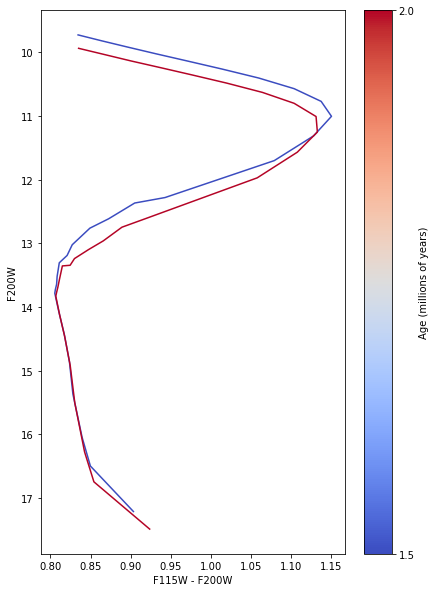

In [5]:
# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)

# Define a colormap
cmap = plt.get_cmap('coolwarm')  # You can choose any colormap you prefer

for i in range(len(log_age_arr)):
    color = cmap(i / (len(log_age_arr) - 1))  # Assign color based on index and colormap
    py.plot(instances[i].points[filters[0]] - instances[i].points[filters[1]], 
           instances[i].points[filters[1]], color=color, label='')
    
py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

# Create colorbar legend
norm = Normalize(vmin=min(level_age_arr), vmax=max(level_age_arr))
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Age (millions of years)')
cbar.set_ticks(level_age_arr)
cbar.set_ticklabels([f'{age/1e6:.1f}' for age in level_age_arr])

plt.show()

In [6]:
mass = 1.0
level_age = 1.6e6
log_age = np.log10(level_age)
level_age_myr = level_age / 1e6

In [7]:
import os
import sys
os.chdir('/scratch/wyz5rge/synthetic-hr/2024/06-10/')
sys.path.append('/scratch/wyz5rge/synthetic-hr/2024/06-10/')

import interpolator_old as interpolator_old
import interpolator_exp as interpolator_exp

In [8]:
star_old = interpolator_old.interpolate(level_age_myr, mass, instances, log_age_arr, filters)
star_exp = interpolator_exp.interpolate(level_age_myr, mass, instances, log_age_arr, filters, filter_zero_points)

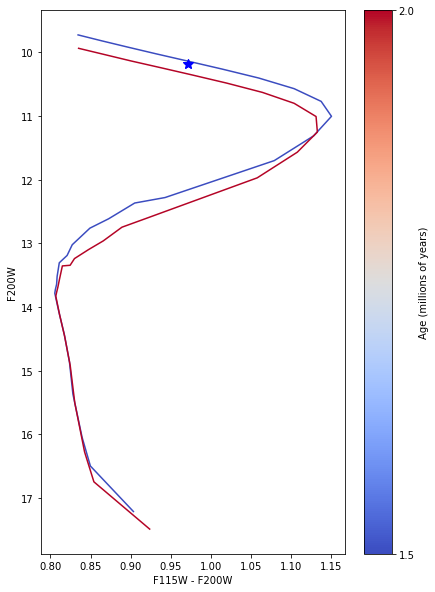

In [9]:
# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)

# Define a colormap
cmap = plt.get_cmap('coolwarm')  # You can choose any colormap you prefer

for i in range(len(log_age_arr)):
    color = cmap(i / (len(log_age_arr) - 1))  # Assign color based on index and colormap
    py.plot(instances[i].points[filters[0]] - instances[i].points[filters[1]], 
           instances[i].points[filters[1]], color=color, label='')
    
py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

# Create colorbar legend
norm = Normalize(vmin=min(level_age_arr), vmax=max(level_age_arr))
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Age (millions of years)')
cbar.set_ticks(level_age_arr)
cbar.set_ticklabels([f'{age/1e6:.1f}' for age in level_age_arr])

py.plot(star_old[3]-star_old[4], star_old[4], marker='*', color='b', markersize=10)
py.plot(star_exp[3]-star_exp[4], star_exp[4], marker='*', color='b', markersize=10)

In [10]:
iso1p6 = synthetic.IsochronePhot(np.log10(1.6e6), AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)

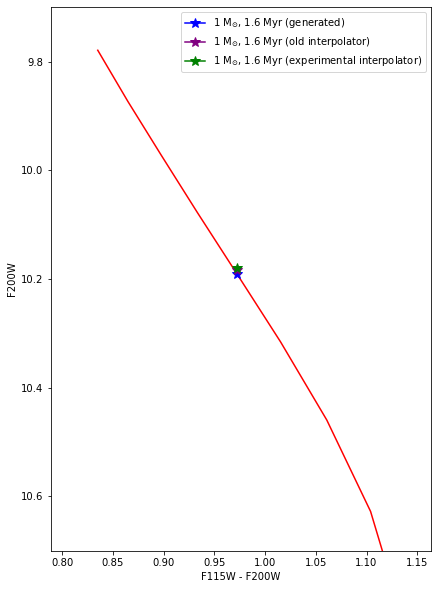

In [11]:
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
py.plot(iso1p6.points[filters[0]] - iso1p6.points[filters[1]], iso1p6.points[filters[1]], color='red')

idx = np.where( abs(iso1p6.points['mass'] - 1.0) == min(abs(iso1p6.points['mass'] - 1.0)) )[0]
py.plot(iso1p6.points[idx][filters[0]] - iso1p6.points[idx][filters[1]], iso1p6.points[idx][filters[1]], marker="*",
       color="b", markersize=10, label="1 M$_{\odot}$, 1.6 Myr (generated)")

py.plot(star_old[3]-star_old[4], star_old[4], marker='*', color='purple', 
        markersize=10, label='1 M$_{\odot}$, 1.6 Myr (old interpolator)')
py.plot(star_exp[3]-star_exp[4], star_exp[4], marker='*', color='g', 
        markersize=10, label='1 M$_{\odot}$, 1.6 Myr (experimental interpolator)')

py.ylim(9.7, 10.7)

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()
py.legend()